In [1]:
#Import packages

import pandas as pd  
import numpy as np
import yfinance as yahooFinance
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import os

Have the initial portfolio, we use the dow jones due to many awalible ESG scores, I also listed the C25 index but many stocks will be excludede due to lagging ESG score

In [2]:
DOW=["UNH","GS","HD","MSFT","AMGN","MCD","CAT","V","CRM","TRV","BA","AXP","JNJ","CVX","AAPL","PG","WMT","MMM","NKE","DIS","IBM","JPM","MRK","KO","VZ","CSCO","INTC","WBA"]

In [3]:
C25=["AMBU-B.CO","BAVA.CO","TRYG.CO","GN.CO","DEMANT.CO","RBREW.CO","DANSKE.CO","VWS.CO","CHR.CO","NETC.CO","NZYM-B.CO","JYSK.CO","ROCK-B.CO","COLO-B.CO","PNDORA.CO","NOVO-B.CO","LUN.CO","ISS.CO","GMAB.CO","CARL-B.CO","AMBU-B.CO","FLS.CO","DSV.CO","MAERSK-B.CO","TIV.CO",]

In [4]:
#C25 stocks wiht and ESG score
CP=["VWS.CO","BEP","ZEG.DE","NOVO-B.CO","MSFT","CSCO","GAZP.ME","XOM"]

In [5]:
#Small test portfolio to test code without to long run time
test=["UNH","GS","HD","CVX","BA"]

For normally when doing etichal investment the traditional approach is to make and exclusive portfolio exculding stocks that engagege in things from a etichal conflict list. Posible conflict in the data set  is ["controversialWeapons","alcoholic","tobacco","gambling","smallArms","militaryContract","coal","catholic","animalTesting","furLeather"] else and inclusive portfolio can be made by including all stocks under a selected ESG treshold. 

In [6]:
conflicts=["controversialWeapons","alcoholic","tobacco","gambling","smallArms","militaryContract","coal","catholic","animalTesting","furLeather"]

In [7]:
#conflicts=[]

In [8]:
good_treshold=16

In [9]:
#Code that load the ESG score into a dataset and make a dataset of stocks wiht and ESG score
#note taks some time to run
portfolio=[]
Ethics=[]

for ticker_code in DOW:  #insert portflio here
    ticker=yahooFinance.Ticker(ticker_code)
    
    scores=ticker.sustainability
    temp=[]
    if scores is None:
        print(f"{ticker_code} score not found")
    else:
        print(f"{ticker_code} score {scores.loc['totalEsg'].values[0]}")
        Ethics.append([ticker_code,scores.loc["totalEsg"].values[0],scores.loc["totalEsg"].values[0]<good_treshold, np.any(scores.loc[conflicts])])
        portfolio.append(ticker_code)
        
Ethics=pd.DataFrame(Ethics,columns=["code","ESG","Inclusive","Exclusive"]) #Convert to data frame

UNH score 17.54
GS score 26.16
HD score 12.54
MSFT score 15.24
AMGN score 22.04
MCD score 24.79
CAT score 34.18
V score 16.07
CRM score 13.18
TRV score 20.52
BA score 34.68
AXP score 18.38
JNJ score 25.08
CVX score 37.61
AAPL score 16.68
PG score 26.61
WMT score 24.63
MMM score 33.61
NKE score 16.95
DIS score 14.88
IBM score 14.77
JPM score 29.02
MRK score 21.84
KO score 22.56
VZ score 18.48
CSCO score 12.07
INTC score 17.26
WBA score 18.29


In [10]:
Ethics

,code,ESG,Inclusive,Exclusive
0,UNH,17.54,False,True
1,GS,26.16,False,False
2,HD,12.54,True,False
3,MSFT,15.24,True,False
4,AMGN,22.04,False,True
5,MCD,24.79,False,False
6,CAT,34.18,False,False
7,V,16.07,False,False
8,CRM,13.18,True,False
9,TRV,20.52,False,False


In [11]:
#load rawdata from Yahoo finace in selected interwal, and what price to use.
data_raw=pdr.get_data_yahoo(portfolio, start = "2014-01-01", end = "2014-12-31")['Close']



In [12]:
#Find the change in the value invested
data=(data_raw.diff()/data_raw)[1:]
data_log=np.log(data+1)

Find return and variance

In [13]:
mu=data.mean(axis=0)
Sigma=data.cov()

In [14]:

mu_log=data_log.mean(axis=0)
Sigma_log=data_log.cov()

In [15]:
Sigma

Symbols,UNH,GS,HD,MSFT,AMGN,MCD,CAT,V,CRM,TRV,...,NKE,DIS,IBM,JPM,MRK,KO,VZ,CSCO,INTC,WBA
Symbols,,,,,,,,,,,,,,,,,,,,,
UNH,0.000140,0.000057,0.000041,0.000048,0.000076,0.000028,0.000053,0.000066,0.000068,0.000030,...,0.000057,0.000055,0.000042,0.000061,0.000039,2.306549e-05,0.000018,0.000038,0.000048,4.278137e-05
GS,0.000057,0.000120,0.000049,0.000055,0.000082,0.000025,0.000057,0.000074,0.000105,0.000036,...,0.000063,0.000069,0.000045,0.000093,0.000049,1.990067e-05,0.000034,0.000045,0.000061,5.502996e-05
HD,0.000041,0.000049,0.000110,0.000042,0.000061,0.000023,0.000036,0.000050,0.000076,0.000026,...,0.000054,0.000052,0.000026,0.000050,0.000034,1.626775e-05,0.000029,0.000028,0.000033,4.247454e-05
MSFT,0.000048,0.000055,0.000042,0.000143,0.000057,0.000030,0.000047,0.000041,0.000084,0.000026,...,0.000043,0.000053,0.000049,0.000058,0.000029,2.452716e-05,0.000046,0.000050,0.000091,5.017064e-05
AMGN,0.000076,0.000082,0.000061,0.000057,0.000239,0.000029,0.000054,0.000091,0.000148,0.000032,...,0.000073,0.000086,0.000026,0.000074,0.000072,1.349073e-05,0.000040,0.000044,0.000064,7.386518e-05
MCD,0.000028,0.000025,0.000023,0.000030,0.000029,0.000064,0.000034,0.000025,0.000054,0.000022,...,0.000040,0.000033,0.000026,0.000027,0.000023,2.953067e-05,0.000019,0.000024,0.000030,3.154162e-05
CAT,0.000053,0.000057,0.000036,0.000047,0.000054,0.000034,0.000158,0.000056,0.000084,0.000034,...,0.000049,0.000055,0.000045,0.000061,0.000043,2.137195e-05,0.000027,0.000049,0.000060,5.458606e-05
V,0.000066,0.000074,0.000050,0.000041,0.000091,0.000025,0.000056,0.000174,0.000114,0.000041,...,0.000072,0.000075,0.000040,0.000067,0.000050,2.583486e-05,0.000028,0.000047,0.000040,5.539124e-05
CRM,0.000068,0.000105,0.000076,0.000084,0.000148,0.000054,0.000084,0.000114,0.000467,0.000039,...,0.000112,0.000113,0.000058,0.000101,0.000081,3.006832e-05,0.000052,0.000078,0.000084,1.058086e-04


In [16]:
#Plot how a portfolio will allocate risk 
def risk_plot(waights,names,T=""):
    n_portfolios=len(waights)
    n_stocks=len(waights[0])

    fig, ax = plt.subplots(figsize=(10,5))
    x = np.arange(n_stocks)  # the label locations
    width = 0.9/n_portfolios  # the width of the bars

    for p in range(len(waights)):

        ax.bar(x+width*p-width*n_portfolios/2,
               waights[p]*(Sigma@waights[p])/(waights[p]@Sigma@waights[p]),
               width,label=names[p])
    ax.set_ylabel('Risk alocation')
    plt.title(T)
    ax.legend()
    ax.set_ylabel('Risk alocation')
    plt.xticks(x,labels=data.columns.to_list(),rotation =45)
    plt.show()

#Plot how a portfolio will allocatete investement
def alocation_plot(waights,names,T):
    n_portfolios=len(waights)
    n_stocks=len(waights[0])

    fig, ax = plt.subplots(figsize=(10,5))
    x = np.arange(n_stocks)  # the label locations
    width = 0.9/n_portfolios  # the width of the bars

    for p in range(len(waights)):

        ax.bar(x+width*p-width*n_portfolios/2,
               waights[p],
               width,label=names[p])
    plt.title(T)
    ax.legend()
    ax.set_ylabel('Alocation')
    plt.xticks(x,labels=data.columns.to_list(),rotation =45)
    plt.show()

Make some classical 1 over N portfolios on the full DOW the exclusive and the inclusive and ilustarate retuturn ESG and risk aloctation

In [17]:
naive_Inclusive=(Ethics.Inclusive/sum(Ethics.Inclusive)).values
naive_Exclusive=(Ethics.Exclusive.values==False)/(np.sum([Ethics.Exclusive.values==False]))

one_overN=np.ones(len(portfolio))/len(portfolio)

In [18]:
ESG_reversed=Ethics.ESG.values-np.max(Ethics.ESG.values)
Normalised_ESG=ESG_reversed/np.sum(ESG_reversed)

In [19]:
pd.DataFrame(data=np.array([[mu@naive_Inclusive,mu@naive_Exclusive,mu@one_overN],
                            [naive_Inclusive@Ethics.ESG,
                             naive_Exclusive@Ethics.ESG,
                             one_overN@Ethics.ESG],
                            [np.sqrt(naive_Inclusive@Sigma@naive_Inclusive),
                             np.sqrt(naive_Exclusive@Sigma@naive_Exclusive),
                             np.sqrt(one_overN@Sigma@one_overN)],
                            [mu@naive_Inclusive/np.sqrt(naive_Inclusive@Sigma@naive_Inclusive),
                             mu@naive_Exclusive/np.sqrt(naive_Exclusive@Sigma@naive_Exclusive),
                             mu@one_overN/np.sqrt(one_overN@Sigma@one_overN)]]),
                             columns=["Selective","Exclusive","1 over N"],index=["Mean return","Mean ESG","Volatility","Sharp Ration"])

,Selective,Exclusive,1 over N
Mean return,0.000474,0.000467,0.000451
Mean ESG,13.780000,19.162632,21.630714
Volatility,0.008758,0.007308,0.006935
Sharp Ration,0.054124,0.063951,0.065027


In [20]:
waights=[naive_Inclusive,naive_Exclusive,one_overN]
names=["Selective","Exclusive","1 over N"]

Plot risk allocation to show that the selective bets on few stocs and allocation. See that the ethical investment is most risky

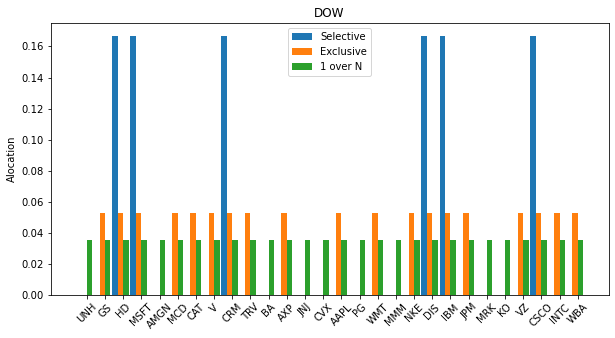

In [21]:
alocation_plot(waights,names,"DOW")

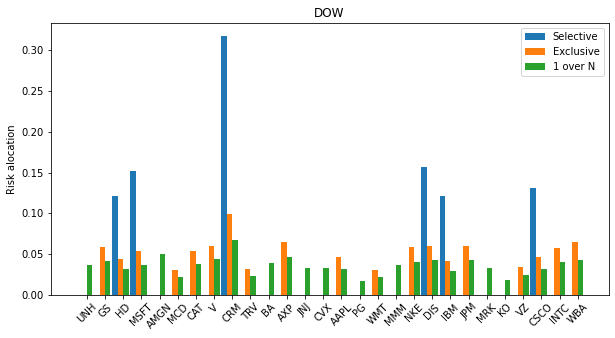

In [22]:
risk_plot(waights,names,"DOW")

In [23]:
import cvxpy as cp

In [24]:
N_stocks=len(waights[0])

## Solution 1
Find the minimum variance portfolie but set a limmet on the maximum allowed mean ESG

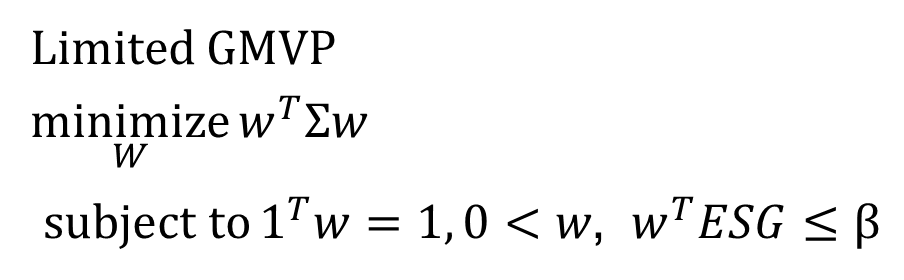

In [25]:

Portfolios=[]
PortfolioExpectedReturn=[]
PortfolioVolatility=[]
PortfolioESG=[]
PortfolioSR=[]
beta=np.arange(14,24,2)

for n,b in enumerate(beta):
    W=cp.Variable(N_stocks)
    objective=cp.Minimize(cp.quad_form(W,Sigma))
    #objective=cp.Maximize(W.T@mu-0.1*cp.quad_form(W,Sigma))
    constaints=[Ethics.ESG.values@W<=b,0<=W,cp.sum(W)==1]
    prob=cp.Problem(objective,constaints)
    
    result=prob.solve()
    
    Wb=W.value
    Portfolios.append(Wb)
    PortfolioExpectedReturn.append(Wb.T@mu)
    PortfolioVolatility.append(np.sqrt(Wb.T@Sigma@Wb))
    PortfolioESG.append(Ethics.ESG.values@Wb)
    PortfolioSR.append(Wb.T@mu/np.sqrt(Wb.T@Sigma@Wb))
    


In [26]:
pd.DataFrame(data=np.array([PortfolioExpectedReturn,PortfolioESG,PortfolioVolatility,PortfolioSR])
             ,columns=beta,index=["Mean return","Mean ESG","Valatility","Sharp Ration"])

,14,16,18,20,22
Mean return,0.000580,0.000512,0.000452,0.000384,0.000306
Mean ESG,14.000000,16.000000,18.000000,20.000017,22.000004
Valatility,0.007060,0.006221,0.005734,0.005460,0.005387
Sharp Ration,0.082117,0.082317,0.078765,0.070262,0.056837


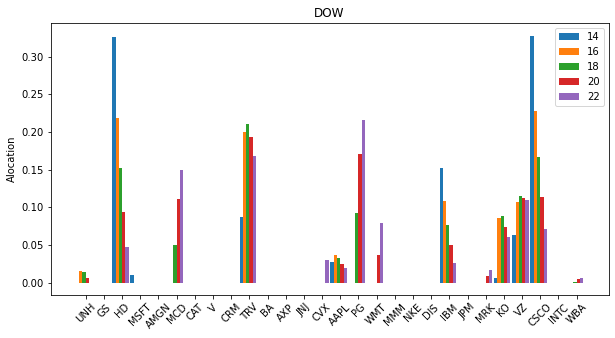

In [27]:
alocation_plot(Portfolios,beta,"DOW")

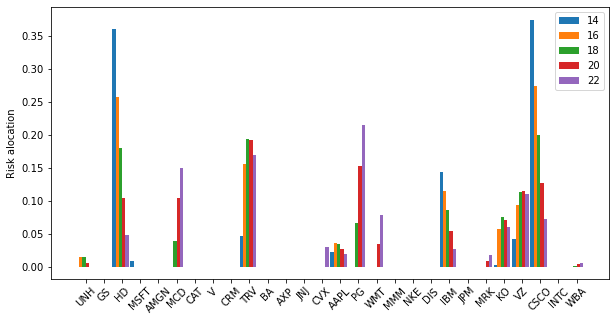

In [28]:
risk_plot(Portfolios,beta)

In [29]:
def constained(Mu,Sigma,b):
    W=cp.Variable(N_stocks)
    objective=cp.Minimize(cp.quad_form(W,Sigma))
    constaints=[Ethics.ESG.values@W<=b,0<=W,cp.sum(W)==1]
    prob=cp.Problem(objective,constaints)
    
    result=prob.solve()
    
    return W.value


# Solution 2: Matkowitz Extended


Markowitz mean-variance portfolio +ESG involves two variable $\alpha$ is how much the investor values returns and $\beta$ is how much the investor values ESG


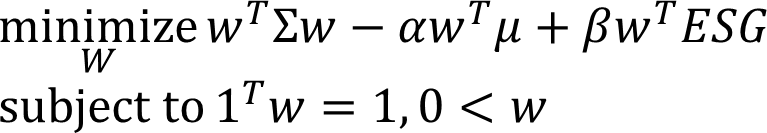

In [30]:
#alocation_plot(Portfolios,np.arange(100))

In [31]:
#Mixed Portfolios

Lambda=np.linalg.norm(np.mean(mu))/np.mean(Ethics.ESG.values)

#alphas=np.round(np.arange(0,0.1,0.01),3)
#betas=np.round(np.arange(0,1,0.1),3)
alphas=np.round(np.arange(0,1,1/100),3)
betas=np.round(np.arange(0,0.0001,0.0001/100),8)[:-1]

Portfolios=[]
PortfolioExpectedReturn=[]
PortfolioVolatility=[]
PortfolioESG=[]
PortfolioSR=[]


#Make convex problem
alpha=cp.Parameter(1)
beta=cp.Parameter(1)
W=cp.Variable(N_stocks)
objective=cp.Minimize(cp.quad_form(W,Sigma)-alpha*W.T@mu+beta*W.T@Ethics.ESG.values)
constaints=[0<=W,cp.sum(W)==1]
prob=cp.Problem(objective,constaints)


#Solve problem
for a in alphas:
    for b in betas:
        alpha.value=[a]
        beta.value=[b]

        result=prob.solve()

        Wb=W.value
        Portfolios.append(Wb)
        PortfolioExpectedReturn.append(Wb.T@mu)
        PortfolioVolatility.append(np.sqrt(Wb.T@Sigma@Wb))
        PortfolioESG.append(Ethics.ESG.values@Wb)
        PortfolioSR.append(Wb.T@mu/np.sqrt(Wb.T@Sigma@Wb))

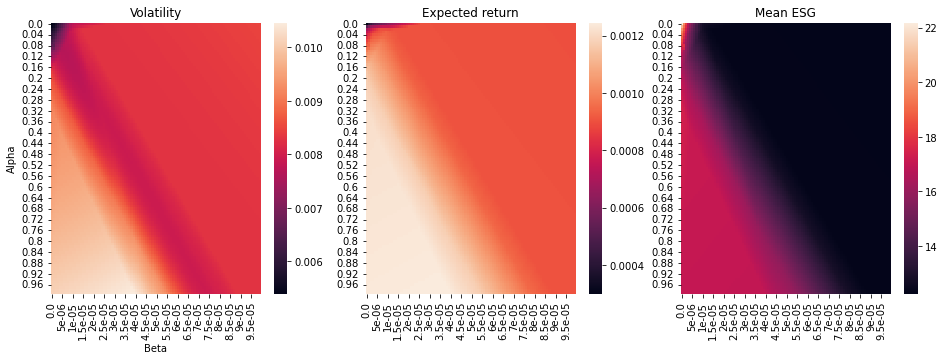

In [32]:
import seaborn as sns

fig,ax=plt.subplots(1,3,figsize=(16,5))

sns.heatmap(pd.DataFrame(np.array(PortfolioVolatility).reshape(100,100),alphas,betas),ax=ax[0])
ax[0].set_title("Volatility")
ax[0].set_ylabel("Alpha")
ax[0].set_xlabel("Beta")
sns.heatmap(pd.DataFrame(np.array(PortfolioExpectedReturn).reshape(100,100),alphas,betas),ax=ax[1])
ax[1].set_title("Expected return")
sns.heatmap(pd.DataFrame(np.array(PortfolioESG).reshape(100,100),alphas,betas),ax=ax[2])
ax[2].set_title("Mean ESG")
plt.show()

In [33]:
def Markowitz_Extended(Mu,Sigma,alpha,beta):
    W=cp.Variable(N_stocks)
    objective=cp.Minimize(cp.quad_form(W,Sigma)-alpha*W.T@Mu+beta*W.T@Ethics.ESG.values)
    constaints=[0<=W,cp.sum(W)==1]
    prob=cp.Problem(objective,constaints)
    result=prob.solve()
    return W.value

# Solution 3: Markowitz_constained

$\alpha$ is still greed but $\beta$ is a limet on how high the ESG score can go 

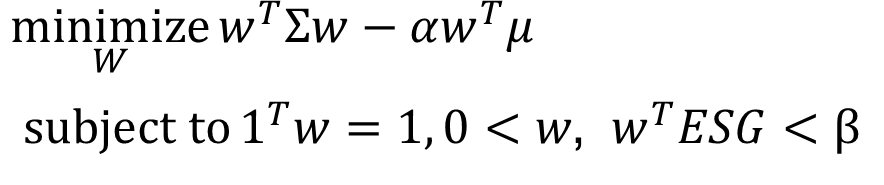


In [34]:
def Markowitz_constained(Mu,Sigma,alpha,beta):

    W=cp.Variable(N_stocks)
    objective=cp.Minimize(cp.quad_form(W,Sigma)-alpha*W.T@Mu)
    constaints=[0<=W,cp.sum(W)==1,W.T@Ethics.ESG.values<=beta]
    prob=cp.Problem(objective,constaints)
    result=prob.solve()
    return W.value

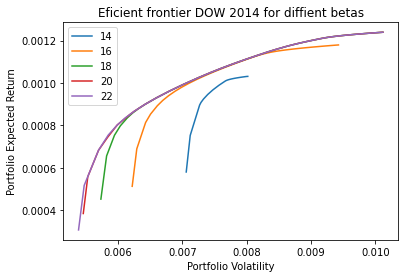

In [35]:
betas=np.arange(14,24,2)

for b in betas:

    PortfolioExpectedReturn=[]
    PortfolioVolatility=[]
    Wbeta=np.empty([3,len(betas)])

    for a in np.arange(0,1,0.01):
        W=np.round(Markowitz_constained(mu,Sigma,a,b),10)
        PortfolioExpectedReturn.append(W@mu)
        PortfolioVolatility.append(np.sqrt(W.T@Sigma@W))
    plt.plot(PortfolioVolatility,PortfolioExpectedReturn,label=b)
plt.legend()
plt.title("Eficient frontier DOW 2014 for diffient betas")
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Expected Return')
plt.show()

# Backtest

 From 2014 to 2022 and reinvest ever half your

In [36]:

def MSRP(Mu,Sigma):
    Wtilde=cp.Variable(N_stocks)
    objective=cp.Maximize(Wtilde@Mu)
    constaints=[cp.quad_form(Wtilde,Sigma)<=1,0<=Wtilde]
    prob=cp.Problem(objective,constaints)
    result=prob.solve()
    W=Wtilde/cp.sum(Wtilde)
    return W.value

def Markowitz(Mu,Sigma,alpha):

    W=cp.Variable(N_stocks)
    objective=cp.Minimize(cp.quad_form(W,Sigma)-alpha*W.T@Mu)
    constaints=[0<=W,cp.sum(W)==1]
    prob=cp.Problem(objective,constaints)
    result=prob.solve()
    return W.value

In [37]:
#Back test
#load data
data_B_raw=pdr.get_data_yahoo(portfolio, start = "2015-01-01", end = "2021-12-31")['Close']
data_B=(data_B_raw.diff()/data_B_raw)[1:]
#data_B_log=data_raw.apply(np.log).apply(np.diff)


In [38]:
def cum_sum(initial,W,data):
    s=initial
    returns=pd.Series(index=data.index)
    for i in range(shift-1):
        s=s+s*data.iloc[i]@W
        returns.iloc[i]=s
    return returns,s

In [39]:

shift=176
periods=10
algoritms=["Markowitz alpha 0.5","Markowitz Extended alpha 0.5 beta 10^(-5)","Markowitz Extended alpha 0.5 beta 5*10^(-5)","Markowitz 0.5 Constained ESG<16","MSRP","1 over N","1 over selective","1 over exclusive"]
returns=pd.DataFrame(columns=algoritms)
ESG=pd.DataFrame(index=algoritms)
VAR=pd.DataFrame(index=algoritms)
SR=pd.DataFrame(index=algoritms)
Variance=pd.DataFrame(index=algoritms)
W_list=[]
last_return=np.ones(len(algoritms))
for p in range(2,periods):
    train_data=data_B[shift*(p-2):shift*p-1]
    mu_train=np.mean(train_data,axis=0)
    sigma_train=train_data.cov()
    
    w_M=np.round(Markowitz(mu_train,sigma_train,0.5),10)
    w_M_ESG1=np.round(Markowitz_Extended(mu_train,sigma_train,0.5,10**(-5)),10)
    w_M_ESG2=np.round(Markowitz_Extended(mu_train,sigma_train,0.5,5*10**(-5)),10)
    w_M_c=np.round(Markowitz_constained(mu_train,sigma_train,0.5,16),10)
    #w_GMVP=np.round(AlphaBeta(mu_train,sigma_train,0,0),10)
    w_MSRP=MSRP(mu_train,sigma_train)
    waights=[w_M,w_M_ESG1,w_M_ESG2,w_M_c,w_MSRP,one_overN,naive_Inclusive,naive_Exclusive]
    W_list.append(waights)
    temp=pd.DataFrame()
    VAR_temp=[]
    ESG_temp=[]
    SR_temp=[]
    test_data=data_B[shift*p:shift*(p+1)]
    test_mean=test_data.mean(axis=0)
    test_volatility=test_data.cov()
    for a,alg in enumerate(algoritms): 
        r,last_return[a]=cum_sum(last_return[a],waights[a],test_data)
        temp[alg]=r
        VAR_temp.append(np.sqrt(waights[a].T@test_volatility@waights[a]))
        ESG_temp.append(waights[a]@Ethics.ESG)
        SR_temp.append(waights[a]@test_mean/np.sqrt(waights[a].T@test_volatility@waights[a]))
    ESG.insert(p-2,f"{data_B.index[shift*(p+1)].strftime('%Y-%m')}",ESG_temp)
    SR.insert(p-2,f"{data_B.index[shift*(p+1)].strftime('%Y-%m')}",SR_temp)
    VAR.insert(p-2,f"{data_B.index[shift*(p+1)].strftime('%Y-%m')}",VAR_temp)
    returns=pd.concat([returns,temp])
       


C:\Users\Andre\AppData\Local\Temp\ipykernel_16308\3454558258.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  returns=pd.Series(index=data.index)
C:\Users\Andre\AppData\Local\Temp\ipykernel_16308\3454558258.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  returns=pd.Series(index=data.index)
C:\Users\Andre\AppData\Local\Temp\ipykernel_16308\3454558258.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  returns=pd.Series(index=data.index)
C:\Users\Andre\AppData\Local\Temp\ipykernel_16308\3454558258.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly

C:\Users\Andre\AppData\Local\Temp\ipykernel_16308\3454558258.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  returns=pd.Series(index=data.index)
C:\Users\Andre\AppData\Local\Temp\ipykernel_16308\3454558258.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  returns=pd.Series(index=data.index)
C:\Users\Andre\AppData\Local\Temp\ipykernel_16308\3454558258.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  returns=pd.Series(index=data.index)
C:\Users\Andre\AppData\Local\Temp\ipykernel_16308\3454558258.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly

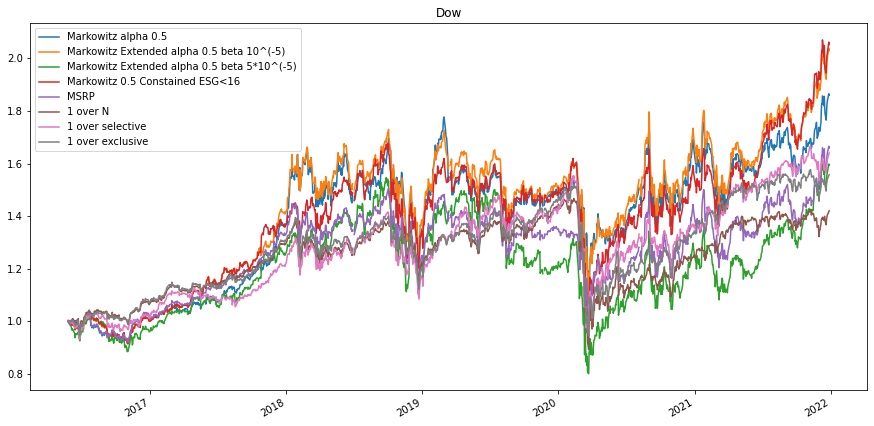

In [40]:
returns.plot(figsize=(15,7.5))
plt.title("Dow")
plt.show()

Text(0.5, 1.0, 'ESG DOW')

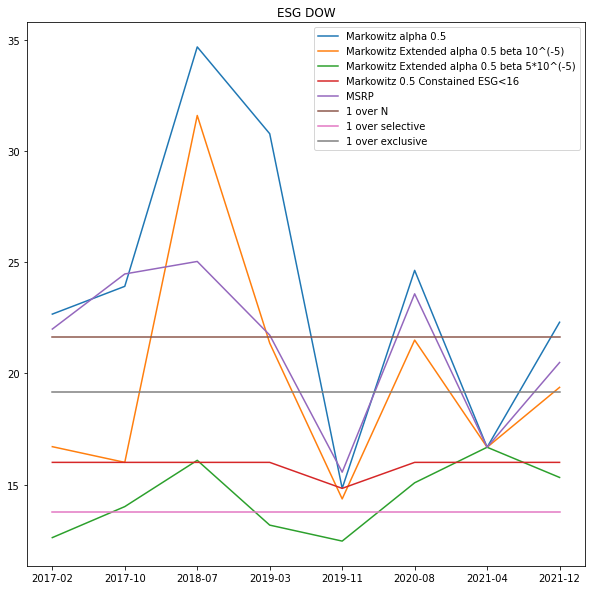

In [41]:
ESG.T.plot(figsize=(10,10))
plt.title("ESG DOW")

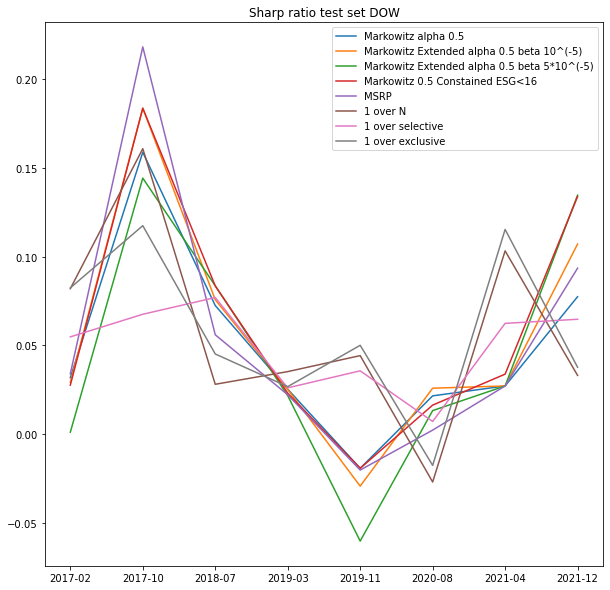

In [42]:
SR.T.plot(figsize=(10,10))
plt.title("Sharp ratio test set DOW")
plt.show()

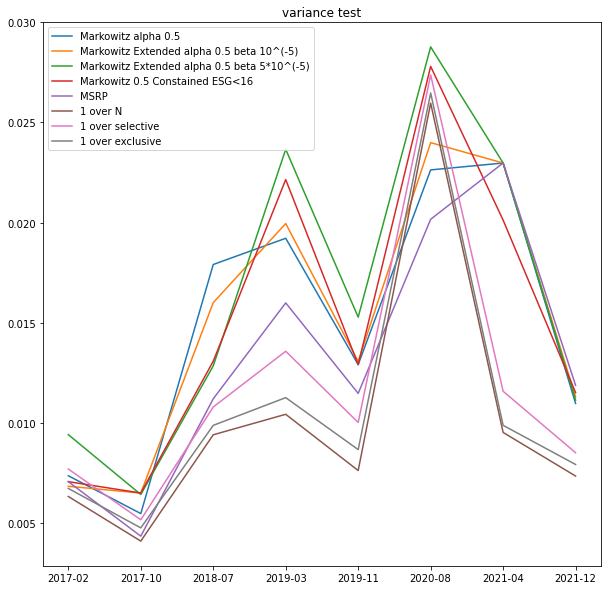

In [43]:
VAR.T.plot(figsize=(10,10))
plt.title("variance test")
plt.show()

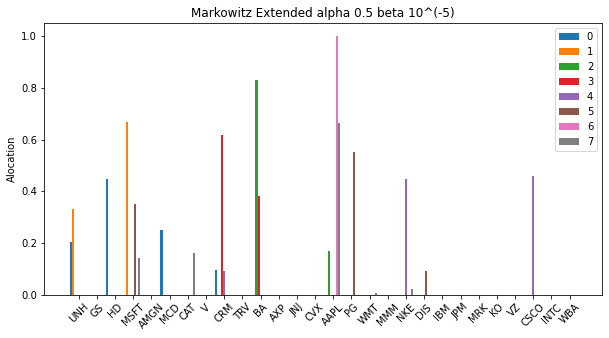

In [44]:
#See all cation for each algoritme
a=1
alocation_plot(np.array(W_list)[:,a],np.arange(8),algoritms[a])